<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 7
<a class="tocSkip">    
</h1> 

# Imports section

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Regresion lineal
## Cálculo de la linea de regresion
+ Ordenada en el origen = intercept
+ pendiente = slope
+ Residuos = como de distinta es la pred del modelo con respecto a lo que tengo en la muestra. Si la prediccion y el modelo son muy parecidos, hay poco residuo.


+ **Ejemplo:** como es la primera vez que hacemos esto, usaremos Python y las ecuaciones anteriores para obtener la recta de regresión para los datos del archivo [07_simple_linear_regression_01.csv](./data/07_simple_linear_regression_01.csv). Para ser claros: esta no es la mejor manera de hacer esto en Python, sólo lo estamos haciendo ahora por el bien de la práctica y para aprender sobre la covarianza en Python. Para una estructura tipo array $A$ (array de NumPy o DataFrame de Pandas con columnas numéricas), la función `cov` devuelve una matriz $C$, donde el elemento $C[i, j]$ es la covarianza de las columnas $i$-ésima y $j$-ésima de $A$, y la diagonal de $C$ contiene las varianzas de cada columna de $A$. Esta $C$ se llama la **matriz de covarianza** de las columnas de $A$.

In [14]:
# vamos a calcular la recta de regresion paso a paso
# Load the data
A = pd.read_csv("./data/07_simple_linear_regression_01.csv")

# Check the column names
print(A.head()) 

# Compute the covariance matrix.
# In this case A only has two columns, but in general we 
# may need to select the columns before getting the covariance matrix.
# primero calculamos la covarianza.
# haciendo: A.cov() el resultado sería el mismo
# nos interesa la celda resultado de X con Y
COV_A = A[['X', 'Y']].cov()
print("--"*20, "\n")
print("This is the covariance matrix: \n", COV_A)
#print(COV_A)

# We extract the elements of the covariance matrix that
# we need for the regression line:
cov_A = COV_A.iloc[0, 1]
s2_x = COV_A.iloc[0, 0]

# Compute the means of the columns 
# centro de la muestra
barX = A.X.mean()
barY = A.Y.mean()

# and plug all these values in the equations
# for the regression line coefficients
b1 = cov_A / s2_x
b0 = barY - b1 * barX 
print("--"*20, "\n")
print("The regression line coefficients are \n b0 = {:.6} \n b1 = {:.6}".format(b0, b1))

          X         Y
0  0.247426  3.222475
1  0.092990  2.725928
2  0.611763  3.885317
3  0.060662  3.023520
4  0.661033  4.196188
---------------------------------------- 

This is the covariance matrix: 
           X         Y
X  0.090223  0.180715
Y  0.180715  0.455194
---------------------------------------- 

The regression line coefficients are 
 b0 = 3.00341 
 b1 = 2.00299


In [15]:
# con python
# Load the data into a pandas DataFrame
A = pd.read_csv("./data/07_simple_linear_regression_01.csv")

# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = A.X.values
X = X[:, np.newaxis] # para convertir el vector en la matriz 

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = A.Y.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model | intercept = ordenada en el origen. b0 = 0 es cuando pasa por el origen.
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
# le pedismo propiedades al modelo.
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = 3.00341 + 2.00299 x


### Una vez entrenado el modelo, podemos usarlo para predecir datos

+ **Example:** The range of the $X$ values in our example is approximately the $[0, 1]$ interval.
+ Let us check that $X = 0.3$ is not in the sample
+ We can try to use our regression line to predict the value of $Y$ for $X = 0.3$.

In [16]:
print ([X.min(), X.max()])
print(np.any(X == 0.3))
# Create an array from the list of X coordinates of new observtions
# quiero predecir un valor nuevo, lo metemos en un array para pasarlo como param. poorque se pueden predecir varios a la vez
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# una vez especificados los valores, le decimos que lo prediga, a partir de la recta que hemos calculado antes (y = 3.00341 + 2.00299 x)
# por eso, siempre que hacemos esto, estamos calculando valores de la recta.
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
Y_new

[0.0005218477242485, 0.9960870122797092]
False


array([3.6043027])

+ In fact, the same idea works for a lot of new values. And we can use that to plot the regression line by: (1) generating a grid with a large number of values of X through the range of the sample, (2) predicting their Y coordinates using the regression line and (3) plotting the predicted points.

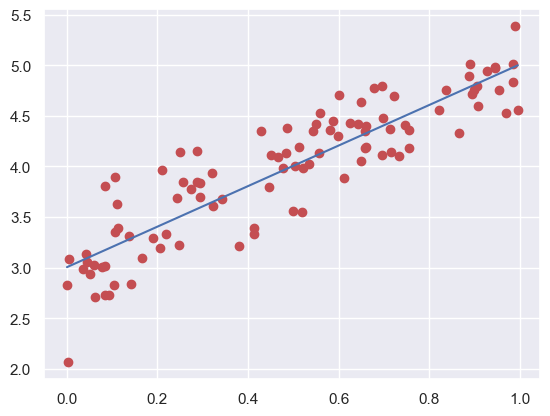

In [17]:
# The linspace funtion generates the grid
# linespace es como un rango, le das el minimo y el máximo y el numero de trozos en los que quieres dividir.
X_new = np.linspace(X.min(), X.max(), num = 100) # pinta los puntos rojos.

# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro') # pinta la muestra
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

# ANOVA (Analysis of Variance).  Pearson's Correlation Coefficient

In [18]:
A.corr() # para sacar la matriz de correlacion

,X,Y
X,1.000000,0.891739
Y,0.891739,1.000000


# Inferencia en regresion lineal
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Modelo de regresion lineal simple.}
\quad\\
\quad\\
\hspace{1cm}Y = \underbrace{\beta_0 + \beta_1 X}_{\text{modelo}} + 
    \underbrace{\epsilon}_{\text{ruido}}
\quad\\
\quad\\
$
}
$$</p> 

+ **Ejemplo:** hagamos una simulación en la que tenemos 5 muestras (de tamaño $n = 30$ cada una) de una población en la que tenemos dos variables aleatorias relacionadas a través de un modelo lineal abstracto  
$$Y = 4 - 2 X + \epsilon_i$$
es decir, $\beta_0 = 4, \beta_1 = -2$. También suponemos que la varianza común de los errores es $\sigma^2 = 0,25$. Utilicemos NumPy para:

    1. Obtener esas muestras.
    2. Ajustar una recta de regresión para cada muestra
    3. Haz un gráfico de dispersión de las muestras y sus correspondientes rectas de regresión.
    4. Añade también una línea discontinua que represente la línea teórica de la población.
  
  Añadiremos color al gráfico para identificar las muestras.
  
  Añadimos ruido.
  Cuando b1 es 0, ¿sabiendo el valor de la x, por dónde va la y?
    DF0 es 
    fabricamos los x 

In [19]:
rng = np.random.default_rng(2022)

s = np.sqrt(0.25) # varianza de los errores
N=5 # numero de muestras
n=30 # tam de las muestras

# A column to distinguish the data in each sample from the other samples
sampleId = np.repeat(np.arange(N), n)
# The X part of the samples
X = rng.uniform(size = N * n)
# The error variables
Eps = rng.normal(loc = 0, scale = s, size = N * n) # param scale para la desviacion tipica(varianza)

# And the Y part according to the model
beta0 = 4
beta1 = -2
Y = beta0 + beta1 * X + Eps

# Put it all together in a DataFrame
DF = pd.DataFrame({'X': X, 'Y':Y, 'sampleId':sampleId})
#print(DF.head(10)) # test the result

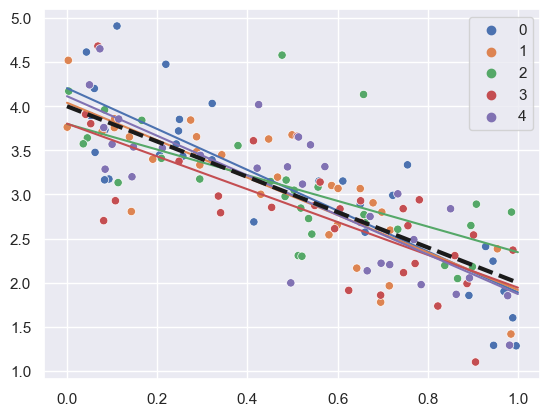

In [20]:
# Pintamos la muestra usando distintos colores por clase
showLegend = True
if(N > 10):
    showLegend = False
sns.scatterplot(data = DF, x = X, y = Y, hue = sampleId, 
                palette="deep", alpha = n/max([n, N]), legend= showLegend)

from sklearn.linear_model import LinearRegression

# This function gets the coefficients for the regression line
# of Y vs X. Both are assumed t be numerical pandas series of the
# same length.
def getLM(X, Y):
    modelXY = LinearRegression(fit_intercept=True)
    X = X.values[:, np.newaxis]
    Y = Y.values
    XY_fit = modelXY.fit(X, Y)
    b1 = XY_fit.coef_[0]
    b0 = XY_fit.intercept_
    return((b0, b1))

# Now let us fit a regression line for each sample and plot the result.
palette2 = iter(sns.color_palette(palette="deep", n_colors=N))

for sample in range(N):
    # select the sample vamos recorriendo fila a fila
    DFs = DF.loc[sampleId == sample, :] 
    Xs = DFs.X
    Ys = DFs.Y
    # fit the regression line entrenamos el modelo y obtenemos los coeficientes
    b0, b1 = getLM(Xs,Ys)
    # plot the line
    Xnew = np.linspace(0, 1, num = 100)# puntos de la x
    Ynew = b0 + b1 * Xnew # ecuación de la recta con los nuevos coefs
    plt.plot(Xnew, Ynew, color = next(palette2))

Xnew = np.linspace(0, 1, num = 100)
Ynew = beta0 + beta1 * Xnew
plt.plot(Xnew, Ynew, "k--", lw = 3)

plt.show()

# Inferencia usando statsmodel


In [21]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression

# pasos previos
DF0  = DF.loc[sampleId == 0]
model_DF0 = LinearRegression(fit_intercept=True)
X = DF0.X.values[:, np.newaxis]
Y = DF0.Y.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)

## USAR ESTE METODO MEJOR
X_1 = sm.add_constant(X) # para añadir una constante en la matriz para que a la hora de multiplicar no se modifique.
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares, 
print(X.shape)
print(X_1.shape)
print(X_1)

DF0_fit = model_DF0.fit() # ajustar el modelo
print("Modelo ajustado")
DF0_fit.summary()


(30, 1)
(30, 2)
[[1.         0.24742606]
 [1.         0.09299006]
 [1.         0.61176337]
 [1.         0.06066207]
 [1.         0.66103343]
 [1.         0.75515778]
 [1.         0.1108689 ]
 [1.         0.04305584]
 [1.         0.41441747]
 [1.         0.98862926]
 [1.         0.96919869]
 [1.         0.25697153]
 [1.         0.55876211]
 [1.         0.24234798]
 [1.         0.32202029]
 [1.         0.89135975]
 [1.         0.94611366]
 [1.         0.72253931]
 [1.         0.92847437]
 [1.         0.99608701]
 [1.         0.2494223 ]
 [1.         0.06229007]
 [1.         0.94479027]
 [1.         0.65028587]
 [1.         0.32167568]
 [1.         0.08336384]
 [1.         0.21924361]
 [1.         0.08417791]
 [1.         0.05213927]
 [1.         0.20525022]]
Modelo ajustado


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     75.77
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.87e-09
Time:                        08:48:05   Log-Likelihood:                -20.594
No. Observations:                  30   AIC:                             45.19
Df Residuals:                      28   BIC:                             47.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2047      0.152     27.748      0.000       3.894       4.515
x1            -2.3130      0.266     -8.705      0.000      -2.857      -1.769
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.662
Skew:                           0.103   Prob(JB):                        0.718
Kurtosis:                       2.302   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ la columna coef nos da la recta de regresión. (4.2-2.31x)

+ p-valor[prob(f-statistic)] h0{b1=0} La hipotesis nula dice que b_1 = 0, es decir, que es horizontal, no hay correlación. Como el pvalor es pequeño, rechazamos la hipotesis nula, podemos decir que hay correlación entre X e Y
+ Rsquared es el coeficiente de correlación
+ La tabla anterior contiene (junto con muchas otras) los resultados que previamente y con mucho esfuerzo hemos elaborado paso a paso. Por ejemplo, el **std err** para el **Intercepto** y el **X** contienen los errores estándar para $b_0$ y $b_1$, y puedes comprobar que coinciden con nuestros resultados anteriores. Además, la sección **[0,025 0,975]** de la tabla muestra los intervalos de confianza para $\beta_0$ y $\beta_1$, este último de nuevo de acuerdo con nuestro cálculo anterior. 

+ Tener este tipo de tabla es agradable, pero a veces querremos utilizar algunos de los resultados que contiene en un cálculo posterior. Por lo tanto, es muy conveniente que `statsmodels` ofrezca una manera de acceder a los componentes relevantes de la tabla directamente. Por ejemplo, para obtener el error estándar de $b_i$:

In [22]:
# Error estandar
DF0_fit.bse

array([0.15153215, 0.26571891])

In [23]:
# Coeficientes del modelo (recta de regresion)
DF0_fit.params

array([ 4.20467907, -2.31300628])

In [24]:
# Intervalos de confianza
DF0_fit.conf_int(alpha=0.05)

array([[ 3.89427953,  4.51507861],
       [-2.8573068 , -1.76870576]])

In [25]:
 # coeficiente de correlación -- Pearson correlation confidence (porcentaje de variabilidad)
DF0_fit.rsquared

0.730177668901771

In [26]:
# pvalores (P>|t| column). Para ver si rechazamos la 𝐻0={𝛽1=0} (variables correladas)
DF0_fit.pvalues

array([6.52161729e-22, 1.87350904e-09])

+ And you can check [this page in the `statsmodels` documentation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

# Gráficos
### Comparación de dos variables numéricas
 + Relacion entre dos variables --> **ScatterPlot**
 
 
Nos interesa la posible relación entre las variables correspondientes a highway hwy vs urban cty

In [27]:
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


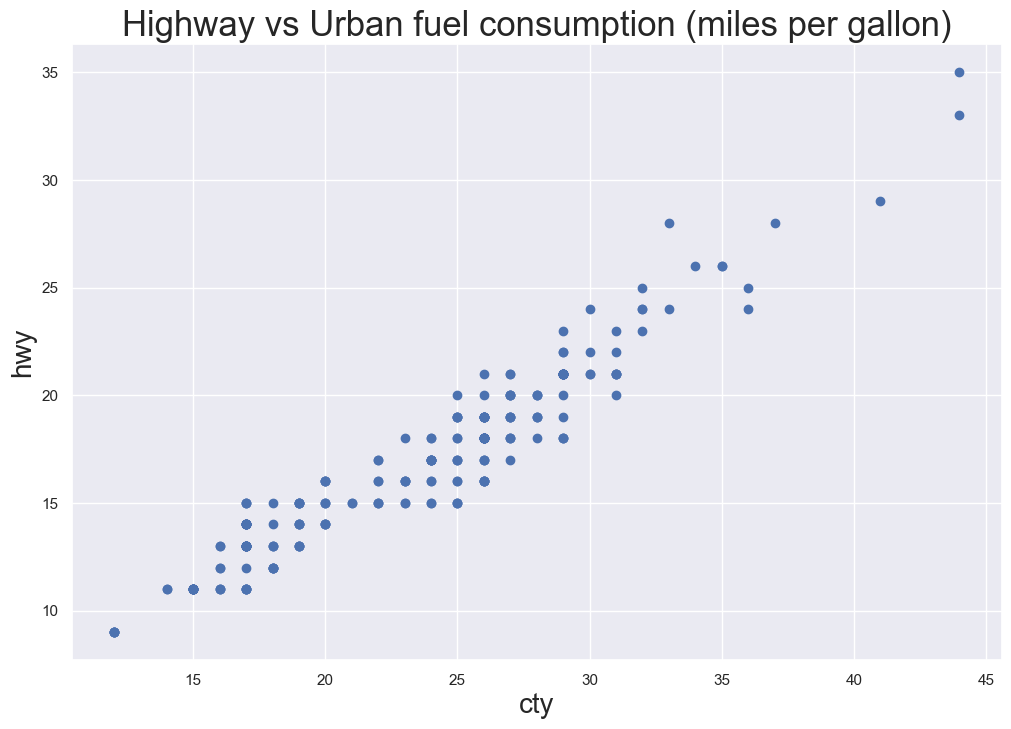

In [28]:
sns.set(rc={'figure.figsize':(12, 8)})
plt.plot('hwy', 'cty', 'bo', data=mpg)# plot hwy and cty using blue circle markers
plt.xlabel('cty', fontdict={'fontsize':20})   
plt.ylabel('hwy', fontdict={'fontsize':20})
plt.title('Highway vs Urban fuel consumption (miles per gallon)', fontdict={'fontsize':25})
plt.show()

#### Para pintar la regresion lineal de las variables cty y hwy

[[0.04305584]
 [0.05268242]
 [0.062309  ]
 [0.07193558]
 [0.08156215]
 [0.09118873]
 [0.10081531]
 [0.11044189]
 [0.12006846]
 [0.12969504]
 [0.13932162]
 [0.1489482 ]
 [0.15857477]
 [0.16820135]
 [0.17782793]
 [0.18745451]
 [0.19708108]
 [0.20670766]
 [0.21633424]
 [0.22596082]
 [0.23558739]
 [0.24521397]
 [0.25484055]
 [0.26446713]
 [0.2740937 ]
 [0.28372028]
 [0.29334686]
 [0.30297344]
 [0.31260001]
 [0.32222659]
 [0.33185317]
 [0.34147975]
 [0.35110632]
 [0.3607329 ]
 [0.37035948]
 [0.37998606]
 [0.38961263]
 [0.39923921]
 [0.40886579]
 [0.41849237]
 [0.42811894]
 [0.43774552]
 [0.4473721 ]
 [0.45699867]
 [0.46662525]
 [0.47625183]
 [0.48587841]
 [0.49550498]
 [0.50513156]
 [0.51475814]
 [0.52438472]
 [0.53401129]
 [0.54363787]
 [0.55326445]
 [0.56289103]
 [0.5725176 ]
 [0.58214418]
 [0.59177076]
 [0.60139734]
 [0.61102391]
 [0.62065049]
 [0.63027707]
 [0.63990365]
 [0.64953022]
 [0.6591568 ]
 [0.66878338]
 [0.67840996]
 [0.68803653]
 [0.69766311]
 [0.70728969]
 [0.71691627]
 [0.72

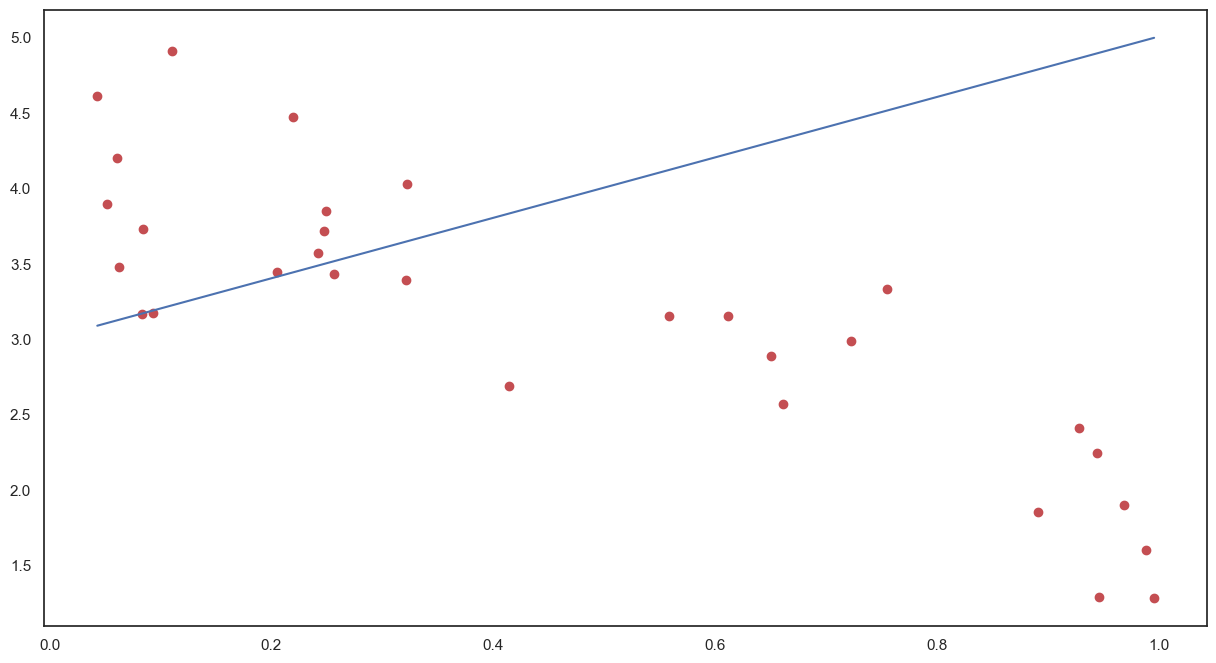

In [43]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100) #Damos el minimo y el maximo, y queremos ir en 100 pasos

# Make it 2D
X_new = X_new[:, np.newaxis]
print(X_new)
# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro') #pinta la muestra inicial
# And the regression line = "predicted points"
plt.plot(X_new, Y_new) #Pinta la recta que acompaña al sample (nuevos valores)
plt.show()

### Una variable numérica 𝑌 como respuesta y un factor 𝐹 como explicativo.
Podemos intentar explorar la posible relación entre la variable cty (numérica continua) y la variable class (factor), que describe el tipo de coche.

Para representar relacion entre variables numericas y factores podemos usar:
+ **Group boxplots** (ordenado y desordenado). Podemos añadir scatter
+ **Displot**
+ **Violinplot**

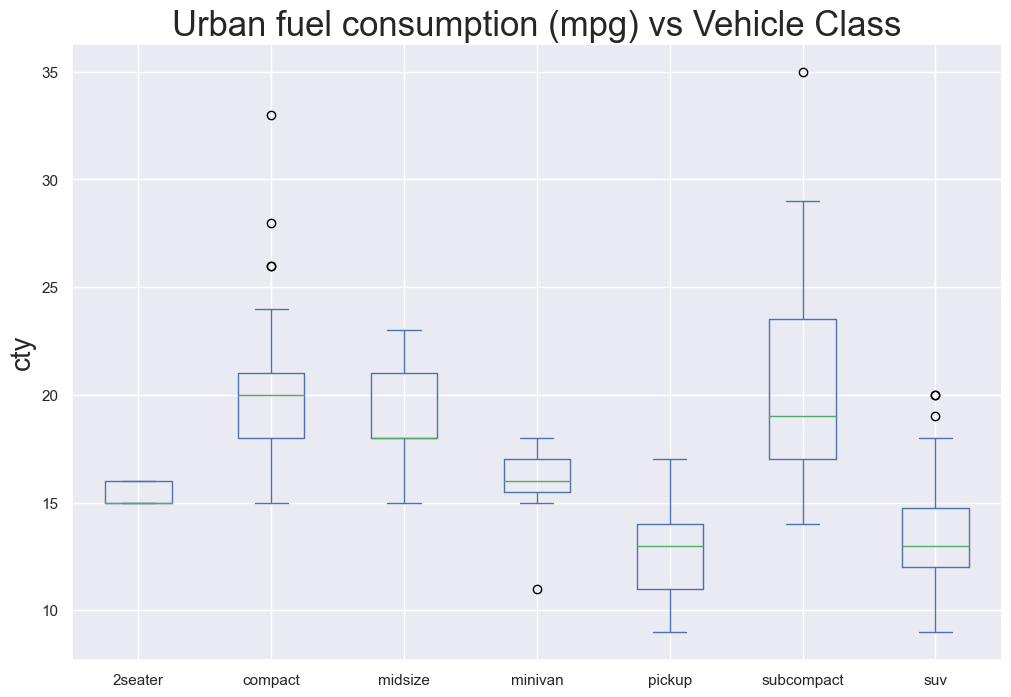

In [30]:
mpg.plot.box(column = 'cty', by = 'class') # by = group by
plt.ylabel('cty', fontdict={'fontsize':20})   
plt.title('Urban fuel consumption (mpg) vs Vehicle Class', fontdict={'fontsize':25})
plt.show()

In [31]:
# Para ordenar los grupos por mediana y que el gráfico salga ordenado, podemos hacerlo así:
mpg[['cty', 'class']].groupby('class').median().sort_values('cty')

,cty
class,
pickup,13.0
suv,13.0
2seater,15.0
minivan,16.0
midsize,18.0
subcompact,19.0
compact,20.0


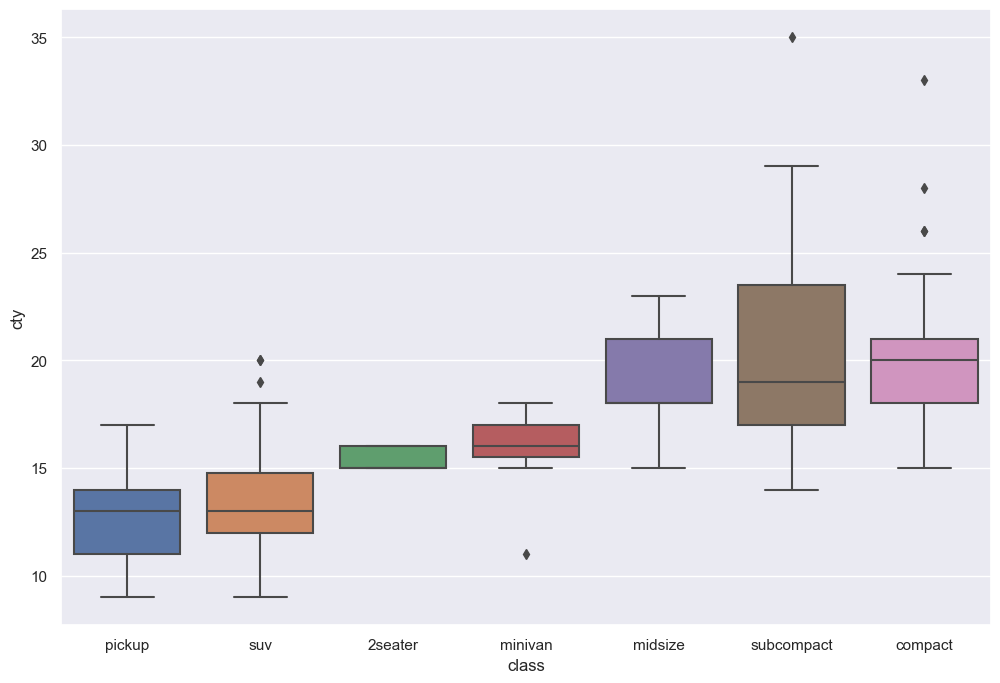

In [32]:
# esta es la lista de clases ordenada (cogido de la tabla de arriba)
class_order_by_cty = list(mpg[['cty', 'class']].groupby('class').median().sort_values('cty').index)

# con el parámetro order podemos especificar el orden en el que queremos pintarlo
sns.boxplot(x='class', y='cty', data=mpg, order=class_order_by_cty)
plt.show()

### Densidades agrupadas

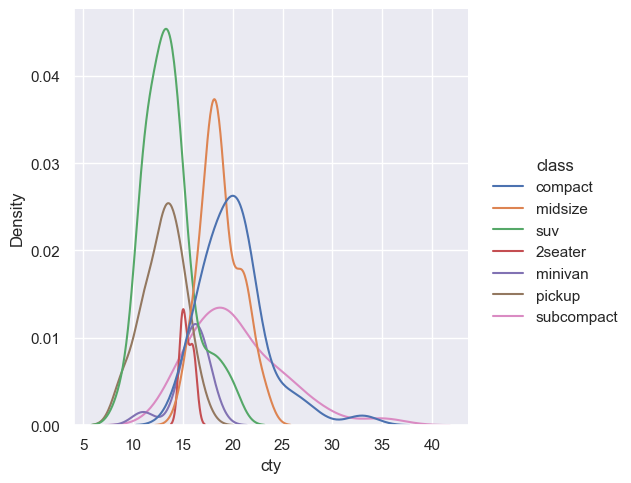

In [33]:
sns.set(rc={'figure.figsize':(15, 8)})
# hue class para pintar todas las clases de la variable 
# kde es para indicar que queremos pintar curvas de densidad
sns.displot(data=mpg, x="cty", hue="class", kind="kde")
plt.show()

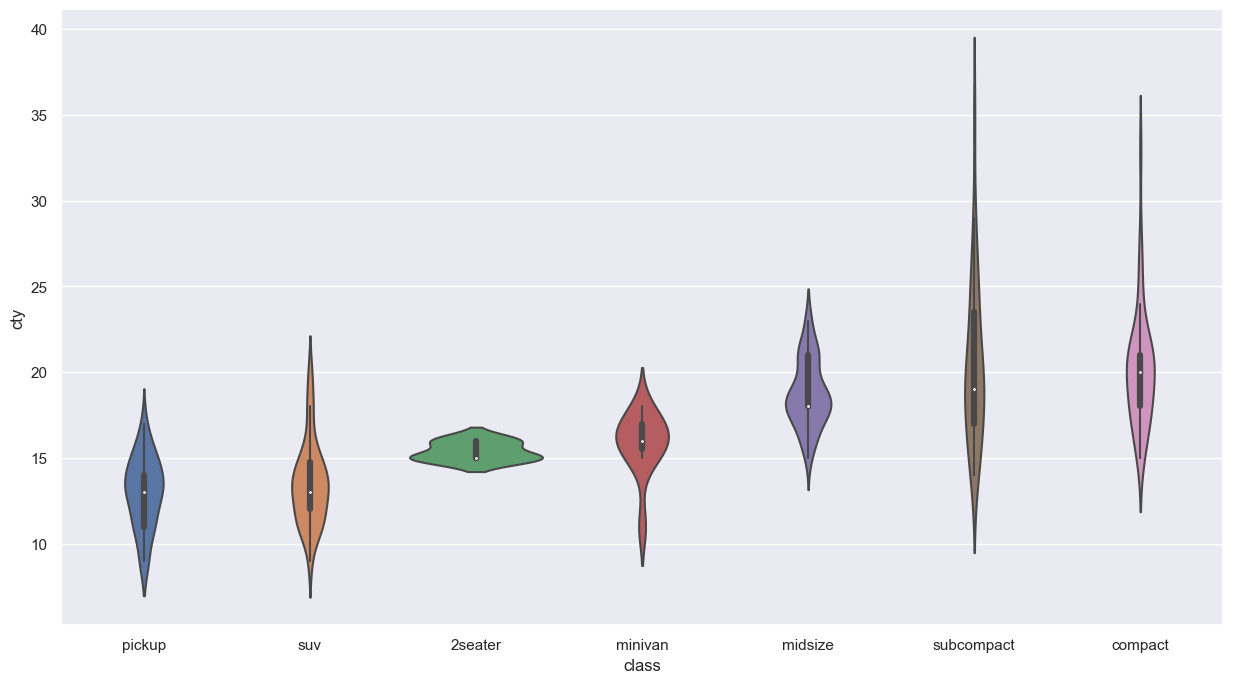

In [34]:
# podemos pintar también los tipos y las densidades usando violinplot (en orden)
sns.violinplot(data=mpg, x="class", y="cty", order=class_order_by_cty)
plt.show()

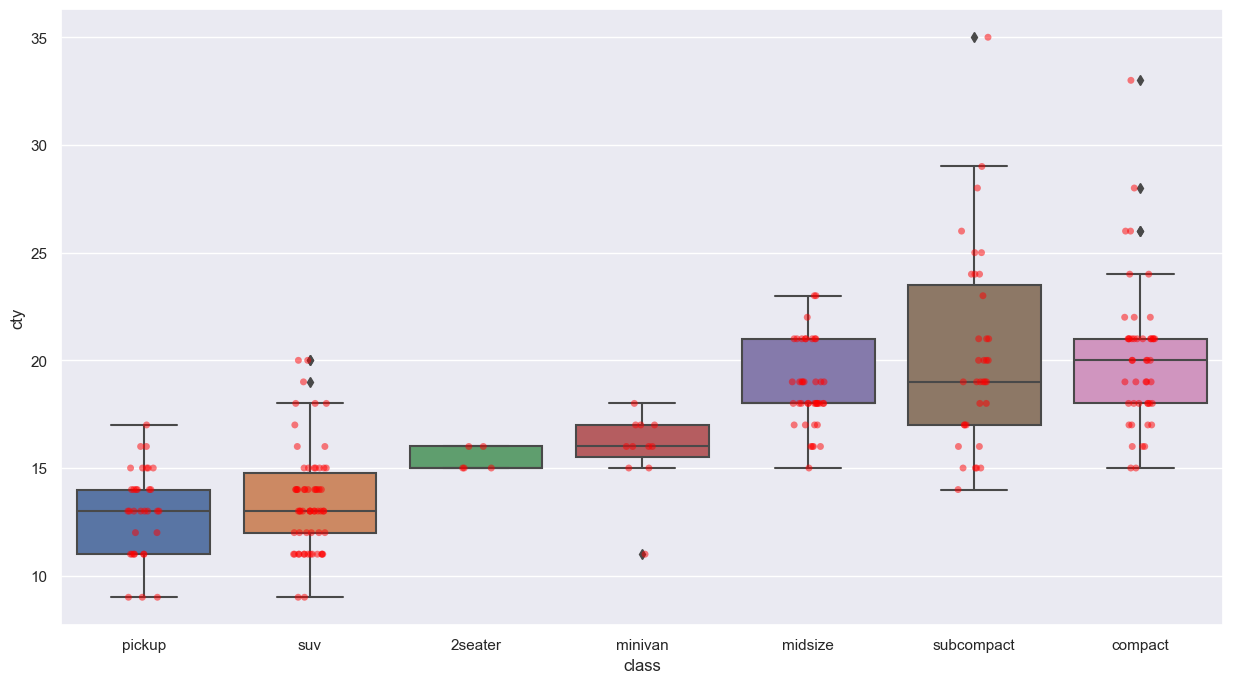

In [35]:
# Podemos añadir los puntos de la variable representados sobre los boxplots para tener una mejor vision de la distribución de la misma
sns.boxplot(x='class', y='cty', data=mpg, order=class_order_by_cty)
sns.stripplot(x='class', y='cty', data=mpg, order=class_order_by_cty, color="red", alpha = 0.5)
plt.show()

### Relacion entre dos factores
Antes de nada, para poder pintar relaciones entre factores necesitamos crear una cross table, para relacionar ambos factores numericamente.

Para representar relacion entre factores podemos usar:
+ **horizontally stacked bar plot**
+ **vertically stacked bar plot**


In [36]:
CT = pd.crosstab(mpg['class'], mpg['cyl'])
CT

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


<AxesSubplot:xlabel='class'>

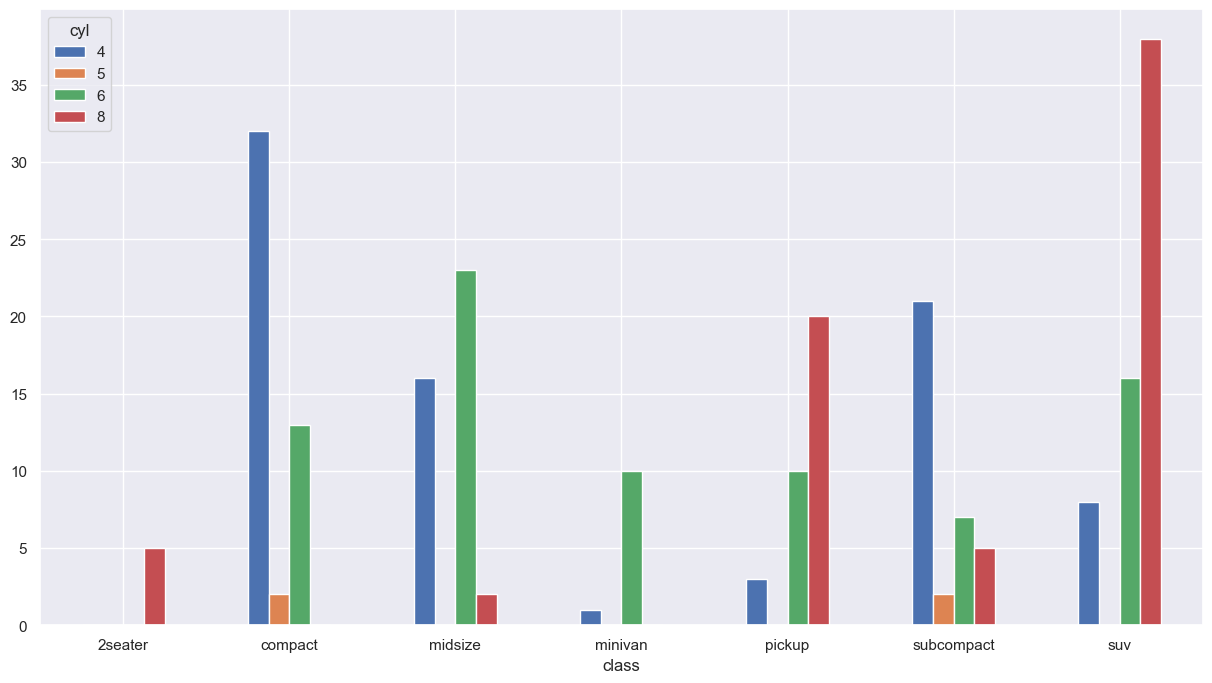

In [37]:
CT.plot.bar(rot=0)# rot es para la rotacion de numeros en los ejes (Estético)

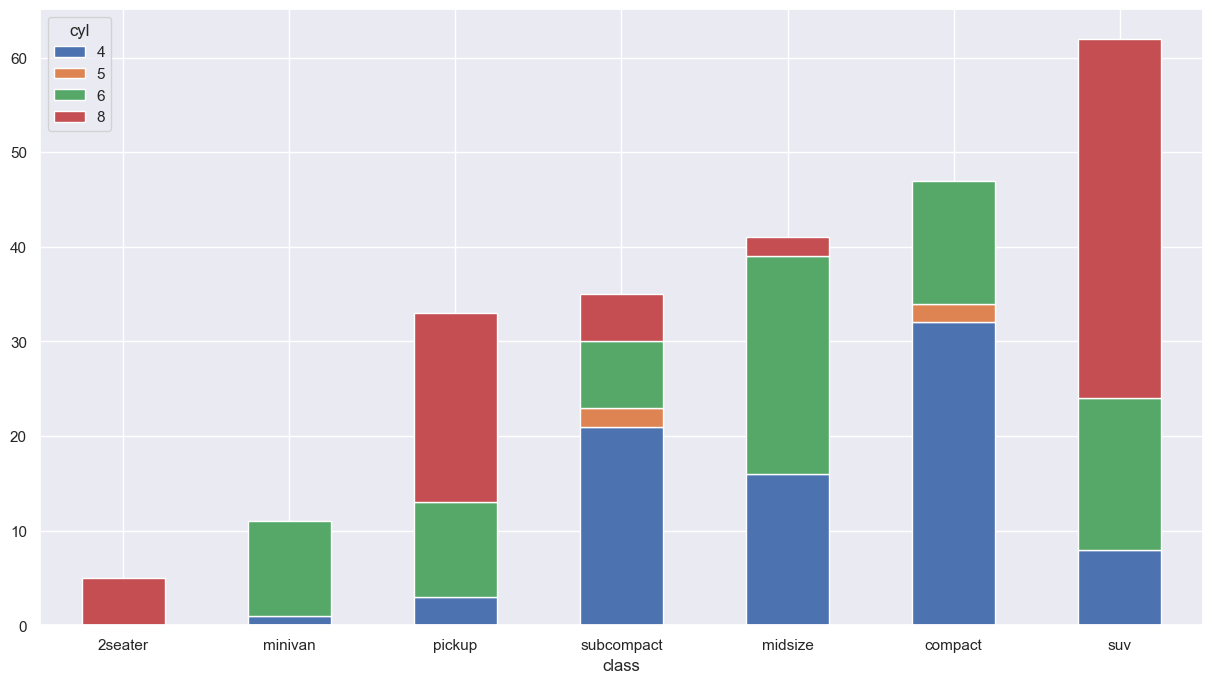

In [38]:
# para ordenar las barras de mayor a menor, hacemos la suma y lo ordenamos por el total
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
# And plot the bar plot
ax = CT2.plot.bar(stacked = True, rot = 0) # stacked para hacerlo apilado

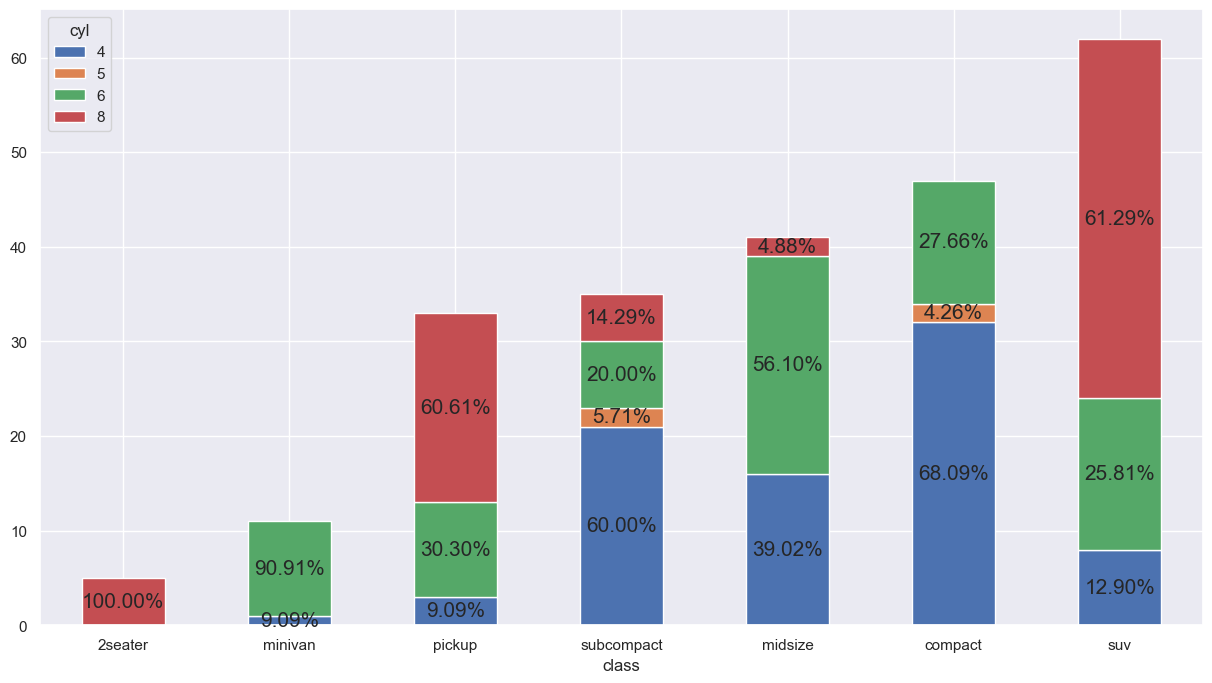

In [39]:
# Para pintar lo mismo con porcentajes
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)

percents.iloc[:, 0]

ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)


plt.show()        



### Relacion entre todas las vars numericas
+ **Pairplot**

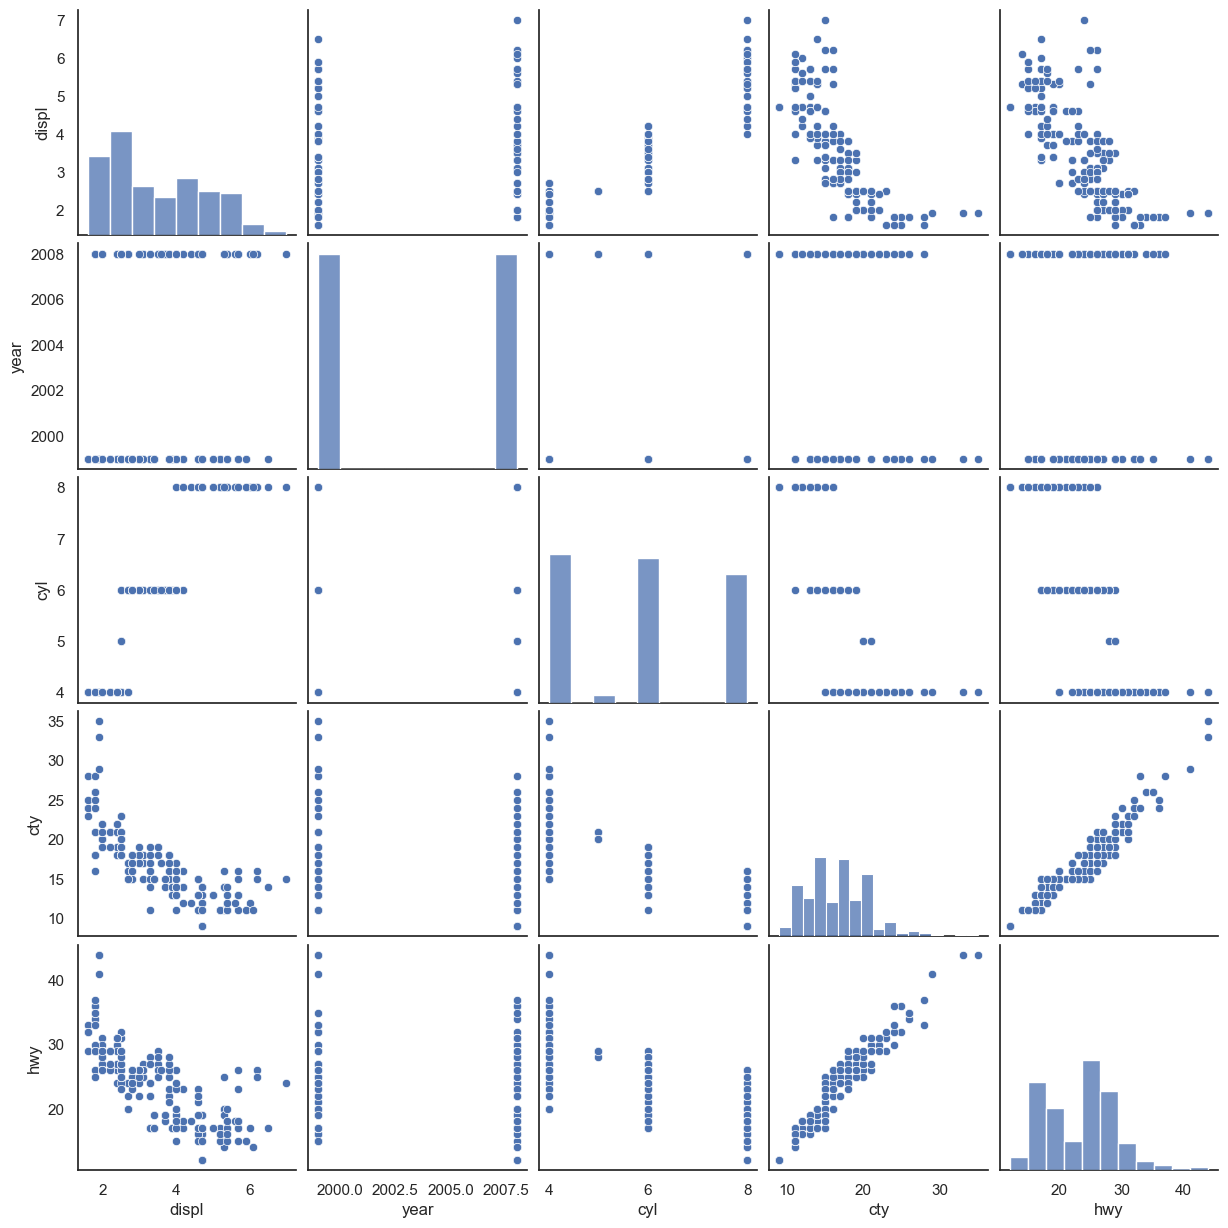

In [40]:
sns.set_style("white")
sns.pairplot(mpg)
plt.show()

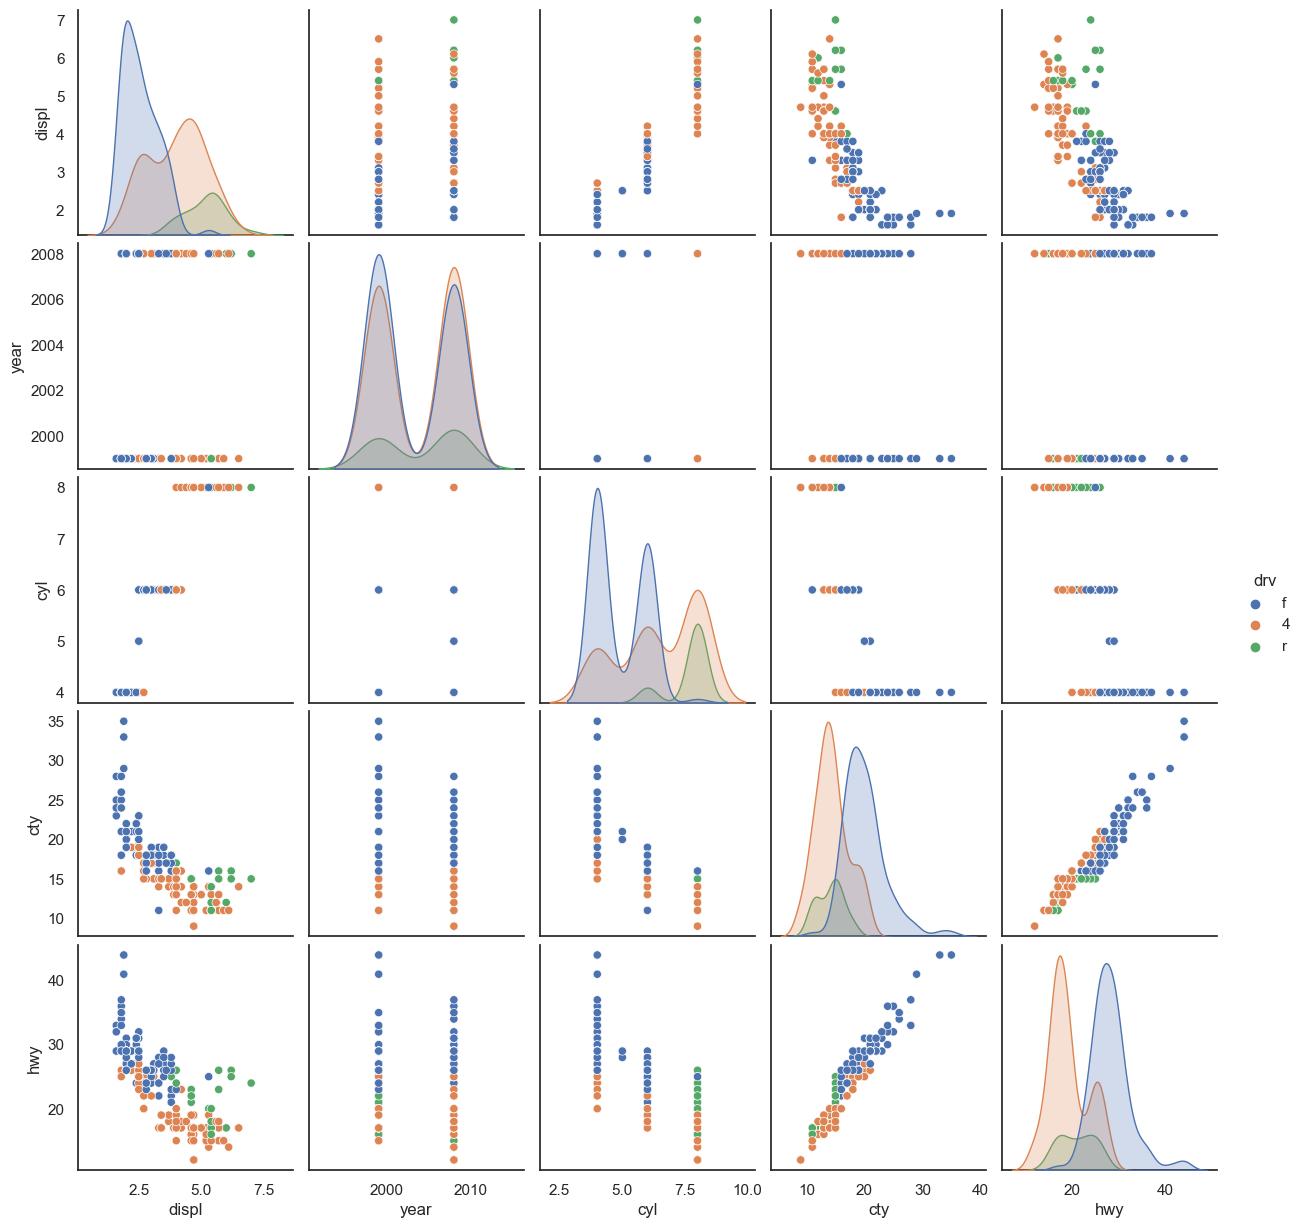

In [41]:
# Los pairplots también se pueden pintar condicionados a una variable. 
# Pairplot solamente pinta variables numericas, si queremos ver la aportacion
# de los factores, podemos hacerlo coloreando por clase (factor = hue)

sns.pairplot(mpg, hue="drv")
plt.show()